#### CONTEXTO Y MOTIVACIÓN

La elección del tema de nuestro proyecto está ligada al fanatismo que tenemos cada uno de los integrantes por el fútbol, bajo esta premisa es que partimos discutiendo qué sería interesante analizar las múltiples estadísticas que se generan en torno al campeonato nacional de fútbol profesional chileno de primera división. Parte de nuestra investigación inicial sobre este tema nos llevó a buscar si la Asociación Nacional de Fútbol Profesional (ANFP) dentro de su página web proveía una base de datos relacionados a las estadísticas de los torneos, equipos, jugadores, etc, no obteniendo un resultado positivo ya que la unica estadistica que presentaba era la del torneo actual, sin desglose por equipos o jugadores. Nuestra segunda fuente que investigamos fue el Ministerio de Deporte (MINDEP), el cual no presentaba bases de datos al respecto.

Luego decidimos realizar una búsqueda en Wikipedia sobre cada año de torneo, fue aquí donde obtuvimos resultados positivos ya que este sitio presentaba varias tablas con información útil respecto al año de torneo que se requería y que podían ser obtenidas a través de web scraping. Como última fuente recurrimos al sitio web de transfermarkt, el cual provee información sobre valores de mercados de los equipos, valores de mercado de los jugadores, ingresos obtenidos por venta de jugadores de los equipos por año, costos obtenidos por la compra de jugadores de los equipos por año, etc. Una vez realizada la investigación inicial, nos dimos cuenta de que eran muchas las preguntas que eran posible intentar contestar a través del análisis de los datos encontrados, lo que nos reafirmó que la elección del tema fue acertada. El hecho de poder aplicar las herramientas y aprendizajes adquiridos en clase nos motivó a encontrar información relevante en este tema de gran interés para nosotros.

Creemos que el público que se beneficiaría de la información que puede entregar este proyecto son primeramente la ANFP, el MINDEP, los mismos equipos de fútbol y también los fanáticos del fútbol. El poder proveer información relevante sobre los
numerosos datos que genera el fútbol en Chile puede ser una motivación extra para la ANFP, por ejemplo, para generar una asociación con mayor transparencia.


#### OBJETIVOS 

Los objetivos iniciales que nos propusimos fueron los siguientes:

1. Analizar y comprender las estadísticas descriptivas de desempeño por equipo por
año de torneo.
2. Analizar y comprender la distribución por región de los equipos en permanencia
en primera división.
3. Analizar la relación entre la popularidad de un equipo (medido en cantidad de
hinchas) y su rendimiento en el torneo por año.
4. Analizar la relación del balance total por equipo en concepto de venta y compra
de jugadores y su rendimiento en el torneo por año.
5. Analizar la relación entre ganancias netas por equipo y su rendimiento en el
torneo por año.

Luego de realizar la busqueda de la información en internet, notamos que podiamos concretar gran parte de estos objetivos exceptuando el quinto y último objetivo, esto debido a que por lo general los equipos representan su información financiera mediante estados financieros que entregan a finales de cada año en archivos pdf, lo que dificulto la extracción de datos. Sumado a que no todos los equipos entregaban estos E.F y a que estos diferian en su forma de presentar la información, es que decidimos eliminar este último objetivo, quedando finalmente así los objetivos:

1. Analizar y comprender las estadísticas descriptivas de desempeño por equipo por
año de torneo.
2. Analizar y comprender la distribución por región de los equipos en permanencia
en primera división.
3. Analizar la relación entre la popularidad de un equipo (medido en cantidad de
hinchas) y su rendimiento en el torneo por año.
4. Analizar la relación del balance total por equipo en concepto de venta y compra
de jugadores y su rendimiento en el torneo por año.

##### Modificar
Los beneficios que creemos podemos obtener mediante este proyecto es conocer las posibles correlaciones existentes entre los rendimientos de los equipos en los torneos por año con respecto a su popularidad, su balance total por concepto de venta y compra de jugadores y las ganancias netas obtenidas por conceptos de merchandising, auspicios, conceptos televisivos, etc.
Con esto, la audiencia objetivo sería como se especificó previamente la ANFP, MINDEP y los mismos equipos. Basados en estos objetivos es que intentaremos responder ciertas preguntas en base a los datos obtenidos.

#### PREGUNTAS DE INVESTIGACIÓN

Inicialmente nuestras preguntas de investigación fueron:

1. ¿Existe correlación entre la popularidad de un equipo y su rendimiento en los torneos?
2. ¿Existe correlación entre las ganancias netas de un equipo y su rendimiento en los torneos?
3. ¿Cómo es la distribución de los equipos por región participantes de los torneos por año?
4. ¿Existe correlación entre ser un equipo de región y el rendimiento de dicho equipo?
5. ¿De qué regiones son los equipos con mejor rendimiento?
6. ¿Existe correlación entre el balance total en concepto de compra y venta de
jugadores de los 3 mejores equipos y los 3 peores equipos de los torneos por
años y su rendimiento en los torneos?
7. ¿Serán los equipos que más invierten los con mejor rendimiento?

Debido a las razones presentadas en el inciso de objetivos, decidimos eliminar la pregunta de investigación 2, quedando finalmente así las preguntas planteadas del proyecto de investigación:

1. ¿Existe correlación entre la popularidad de un equipo y su rendimiento en los torneos?
2. ¿Cómo es la distribución de los equipos por región participantes de los torneos por año?
3. ¿Existe correlación entre ser un equipo de región y el rendimiento de dicho equipo?
4. ¿De qué regiones son los equipos con mejor rendimiento?
5. ¿Existe correlación entre el balance total en concepto de compra y venta de
jugadores de los 3 mejores equipos y los 3 peores equipos de los torneos por
años y su rendimiento en los torneos?
6. ¿Serán los equipos que más invierten los con mejor rendimiento?

### Busqueda, extracción y limpieza de datos

En el siguiente apartado, mostraremos el proceso que realizamos para extraer y limpiar los datos, esto con el fin de poder obtener un dataset que nos permitiera responder las preguntas y objetivos del proyecto de investigación. 

In [16]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import geojson
import geopandas as gpd
from bs4 import BeautifulSoup 
import io
import zipfile
from mpl_toolkits.axes_grid1 import make_axes_locatable
# import plotly.express as px
import seaborn as sns

## Web scraping Wikipedia

Como se explico previamente, nuestra fuente de datos primaria fue wikipedia y transfermarkt. El primer paso para la obtención de la información fue realizar web scraping de la página wikipedia, desde donde pudimos obtener la información estadística de todos los torneos en el intervalo de tiempo medido. A continuación se detalla como realizamos el proceso.

* ## Campeonato Nacional **2010-2011**

In [17]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2010'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
info = soup.find('body',{'class':'mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Primera_División_de_Chile_2010 rootpage-Primera_División_de_Chile_2010 skin-vector action-view skin-vector-legacy'})
tabla = info.find('div',{'id':'content'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'class':'wikitable'})[3].find('tbody')
equipos = tabla.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(10)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2010 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])

df_2010['EQUIPO'] = df_2010['EQUIPO'].replace('San Luis','San Luis de Quillota')
df_2010=df_2010.replace('Colo-Colo 1','Colo-Colo')

df_2010['PTS']=df_2010['PTS'].astype(int)
df_2010['PJ']=df_2010['PJ'].astype(int)
df_2010['PG']=df_2010['PG'].astype(int)
df_2010['PE']=df_2010['PE'].astype(int)
df_2010['PP']=df_2010['PP'].astype(int)
df_2010['GF']=df_2010['GF'].astype(int)
df_2010['GC']=df_2010['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2010=df_2010.set_index(['POS'])


* ## Campeonato Nacional **2011-2012**

In [18]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2011_(Chile)'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body = body=soup.find('body',{'class':'mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Torneo_Clausura_2011_Chile rootpage-Torneo_Clausura_2011_Chile skin-vector action-view skin-vector-legacy'}).find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'align':'center','style':'font-size: 90%; border-collapse:collapse'})
equipos=body[1].find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe.
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)


# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2011 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2011=df_2011.drop(columns='I')

df_2011=df_2011.replace('Colo-Colo[2]​','Colo-Colo')

df_2011['PTS']=df_2011['PTS'].astype(int)
df_2011['PJ']=df_2011['PJ'].astype(int)
df_2011['PG']=df_2011['PG'].astype(int)
df_2011['PE']=df_2011['PE'].astype(int)
df_2011['PP']=df_2011['PP'].astype(int)
df_2011['GF']=df_2011['GF'].astype(int)
df_2011['GC']=df_2011['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2011=df_2011.set_index(['POS'])
df_2011=df_2011.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])


* ## Campeonato Nacional **2012-2013**

In [19]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2012_(Chile)'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body =soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent','class':'vector-body'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'text-align: center;'})[1].find('tbody')
equipos=body.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux=[]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2012 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2012=df_2012.drop(columns='I')

df_2012['EQUIPO']=df_2012['EQUIPO'].replace('Unión Española[5]​','Unión Española')

df_2012['PTS']=df_2012['PTS'].astype(int)
df_2012['PJ']=df_2012['PJ'].astype(int)
df_2012['PG']=df_2012['PG'].astype(int)
df_2012['PE']=df_2012['PE'].astype(int)
df_2012['PP']=df_2012['PP'].astype(int)
df_2012['GF']=df_2012['GF'].astype(int)
df_2012['GC']=df_2012['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2012=df_2012.set_index(['POS'])


* ## Campeonato Nacional **2013-2014**

In [20]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Temporada_2013-2014_del_f%C3%BAtbol_chileno'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'font-size: 90%; border-collapse:collapse'})[2]
equipos=body.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux=[]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2013 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PJ','PG','PE','PP','GF','GC','DIF','PTS'])
df_2013=df_2013.drop(columns='I')

df_2013['EQUIPO']=df_2013['EQUIPO'].replace('U. de Concepción','Universidad de Concepción')

df_2013['PTS']=df_2013['PTS'].astype(int)
df_2013['PJ']=df_2013['PJ'].astype(int)
df_2013['PG']=df_2013['PG'].astype(int)
df_2013['PE']=df_2013['PE'].astype(int)
df_2013['PP']=df_2013['PP'].astype(int)
df_2013['GF']=df_2013['GF'].astype(int)
df_2013['GC']=df_2013['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2013=df_2013.set_index(['POS'])
df_2013=df_2013.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])



* ## Campeonato Nacional **2014-2015**

In [21]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2015_(Chile)'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'font-size: 90%; border-collapse:collapse'})[0].find('tbody')
equipos=body.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux=[]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2014 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2014=df_2014.drop(columns='I')

df_2014['EQUIPO']=df_2014['EQUIPO'].replace('Cobreloa[2]​','Cobreloa')

df_2014['PTS']=df_2014['PTS'].astype(int)
df_2014['PJ']=df_2014['PJ'].astype(int)
df_2014['PG']=df_2014['PG'].astype(int)
df_2014['PE']=df_2014['PE'].astype(int)
df_2014['PP']=df_2014['PP'].astype(int)
df_2014['GF']=df_2014['GF'].astype(int)
df_2014['GC']=df_2014['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2014=df_2014.set_index(['POS'])
df_2014=df_2014.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])



* ## Campeonato Nacional **2015-2016**

In [22]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2016_(Chile)'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'text-align: center; font-size: 90%;'})[1].find('tbody')
equipos=body.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux=[]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2015 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2015=df_2015.drop(columns='I')

df_2015['PTS']=df_2015['PTS'].astype(int)
df_2015['PJ']=df_2015['PJ'].astype(int)
df_2015['PG']=df_2015['PG'].astype(int)
df_2015['PE']=df_2015['PE'].astype(int)
df_2015['PP']=df_2015['PP'].astype(int)
df_2015['GF']=df_2015['GF'].astype(int)
df_2015['GC']=df_2015['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2015=df_2015.set_index(['POS'])
df_2015=df_2015.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])


* ## Campeonato Nacional **2016-2017**

In [23]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2017_(Chile)'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'text-align: center; font-size: 90%;'})[1].find('tbody')
equipos=body.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux=[]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2016 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF','I'])
df_2016=df_2016.drop(columns='I')

df_2016['EQUIPO']=df_2016['EQUIPO'].replace('Cobresal (D)','Cobresal')
df_2016['EQUIPO'] = df_2016['EQUIPO'].replace('San Luis','San Luis de Quillota')

df_2016['PTS']=df_2016['PTS'].astype(int)
df_2016['PJ']=df_2016['PJ'].astype(int)
df_2016['PG']=df_2016['PG'].astype(int)
df_2016['PE']=df_2016['PE'].astype(int)
df_2016['PP']=df_2016['PP'].astype(int)
df_2016['GF']=df_2016['GF'].astype(int)
df_2016['GC']=df_2016['GC'].astype(int)


# 6. Se posiciona el index en la variable POS.
df_2016=df_2016.set_index(['POS'])
df_2016=df_2016.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])


* ## Campeonato Nacional **2017-2018**

In [24]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Torneo_de_Transici%C3%B3n_2017_(Chile)'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'background: #F9F9F9; text-align: center; font-size: 90%; border-collapse:collapse'})[0].find('tbody')
equipos=body.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux=[]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(len(columna))]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2017 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])

df_2017['EQUIPO']=df_2017['EQUIPO'].replace('Colo-Colo[n. 1]​','Colo-Colo')
df_2017['EQUIPO']=df_2017['EQUIPO'].replace('Universidad de Chile[n. 2]​','Universidad de Chile')
df_2017['EQUIPO']=df_2017['EQUIPO'].replace('Santiago Wanderers[n. 3]​','Santiago Wanderers')
df_2017['EQUIPO'] = df_2017['EQUIPO'].replace('San Luis','San Luis de Quillota')


# 6. Se posiciona el index en la variable POS.
df_2017 = df_2017.set_index(['POS'])
df_2017=df_2017.dropna()

df_2017['PTS']=df_2017['PTS'].astype(int)
df_2017['PJ']=df_2017['PJ'].astype(int)
df_2017['PG']=df_2017['PG'].astype(int)
df_2017['PE']=df_2017['PE'].astype(int)
df_2017['PP']=df_2017['PP'].astype(int)
df_2017['GF']=df_2017['GF'].astype(int)
df_2017['GC']=df_2017['GC'].astype(int)

* ## Campeonato Nacional **2018**

In [25]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url_campeonato_2018 = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2018'
respuesta = requests.get(url_campeonato_2018).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup_campeonato_2018 = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
informacion_posiciones = soup_campeonato_2018.find('div', class_='mw-parser-output').find('table',{'align':'center'})
equipos = informacion_posiciones.find_all('tr')[1::]

## Se eliminan los indices que no tienen relación a la información buscada
equipos.pop(16)

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(10)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2018 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])

df_2018['EQUIPO']=df_2018['EQUIPO'].replace('Universidad Católica (C)','Universidad Católica')
df_2018['EQUIPO']=df_2018['EQUIPO'].replace('Deportes Temuco (D)','Deportes Temuco')
df_2018['EQUIPO']=df_2018['EQUIPO'].replace('San Luis (D)','San Luis de Quillota')

df_2018['PTS']=df_2018['PTS'].astype(int)
df_2018['PJ']=df_2018['PJ'].astype(int)
df_2018['PG']=df_2018['PG'].astype(int)
df_2018['PE']=df_2018['PE'].astype(int)
df_2018['PP']=df_2018['PP'].astype(int)
df_2018['GF']=df_2018['GF'].astype(int)
df_2018['GC']=df_2018['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2018=df_2018.set_index('POS')

* ## Campeonato Nacional **2019**

In [26]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url_campeonato_2019 = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2019'
respuesta = requests.get(url_campeonato_2019).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup_campeonato_2019 = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
informacion_posiciones = soup_campeonato_2019.find('div', class_='mw-parser-output').find_all('table',{'align':'center'})[1]
equipos = informacion_posiciones.find_all('tr')[1::]

## Se eliminan los indices que no tienen relación a la información buscada
equipos.pop(16)

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(10)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2019 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2019['PTS']=df_2019['PTS'].astype(int)
df_2019['PJ']=df_2019['PJ'].astype(int)
df_2019['PG']=df_2019['PG'].astype(int)
df_2019['PE']=df_2019['PE'].astype(int)
df_2019['PP']=df_2019['PP'].astype(int)
df_2019['GF']=df_2019['GF'].astype(int)
df_2019['GC']=df_2019['GC'].astype(int)

# 6. Se posiciona el index en la variable POS.
df_2019=df_2019.set_index('POS')

* ## Campeonato Nacional **2020**

In [27]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url_campeonato_2020 = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2020'
respuesta = requests.get(url_campeonato_2020).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup_campeonato_2020 = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
informacion_posiciones = soup_campeonato_2020.find('div', class_='mw-parser-output').find_all('table',{'align':'center'})[1]
equipos = informacion_posiciones.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(9)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios al mismo tiempo que convertimos el tipo de dato a int.
df_2020 = pd.DataFrame(aux, columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2020['PTS']=df_2020['PTS'].astype(int)
df_2020['PJ']=df_2020['PJ'].astype(int)
df_2020['PG']=df_2020['PG'].astype(int)
df_2020['PE']=df_2020['PE'].astype(int)
df_2020['PP']=df_2020['PP'].astype(int)
df_2020['GF']=df_2020['GF'].astype(int) 
df_2020['GC']=df_2020['GC'].astype(int)


---

Una vez recolectada la data de todos los años, generamos un único dataframe acumulado. 

In [28]:
# 1. Concatenamos todos los dataframe.
dataframes_list = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]
df_decada=pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020],axis=0)

# 2. Se elimina la columna DIF
df_decada=df_decada.drop(columns='DIF')

# 3. Se convierten los datos a int.
df_decada['PTS']=df_decada['PTS'].astype(int)
df_decada['PJ']=df_decada['PJ'].astype(int)
df_decada['PG']=df_decada['PG'].astype(int)
df_decada['PE']=df_decada['PE'].astype(int)
df_decada['PP']=df_decada['PP'].astype(int)
df_decada['GF']=df_decada['GF'].astype(int) 
df_decada['GC']=df_decada['GC'].astype(int)

# 4. Se realiza un groupby por la variable EQUIPO y se agrega por suma las demas variables.
df_decada = df_decada.groupby(by='EQUIPO').agg({'PTS':'sum','PJ':'sum','PG':'sum','PE':'sum','PP':'sum','GF':'sum','GC':'sum'})

# 5. Se ordenan los equipos por la variable puntos.
df_decada=df_decada.sort_values(by='PTS',ascending=False)

# Debido a que un equipo cuenta con un partido extra que no deberia estar, regulamos este dato en base a los partidos maximos.
df_decada['PJ']=df_decada['PJ'].replace(334,333)
df_decada=df_decada.reset_index()
df_decada

,EQUIPO,PTS,PJ,PG,PE,PP,GF,GC
0,Universidad Católica,621,333,181,78,74,617,377
1,Colo-Colo,591,333,172,75,86,550,380
2,Universidad de Chile,575,333,163,86,84,607,414
3,Unión Española,502,333,138,88,108,527,470
4,O'Higgins,490,333,136,82,115,471,432
5,Palestino,464,333,125,89,119,459,454
6,Audax Italiano,451,333,119,94,120,499,492
7,Universidad de Concepción,437,333,113,98,122,413,445
8,Huachipato,436,333,116,88,129,447,467
9,Deportes Iquique,383,300,98,90,113,394,450


Una vez que finalizamos el dataframe acumulado de rendimiento, obtuvimos la información de todos los estadios de fútbol de Chile.

In [29]:
# 1. Realizamos el metodo get de la libreria requests para obtener el texto de la página web.
url = 'https://es.wikipedia.org/wiki/Anexo:Estadios_de_f%C3%BAtbol_de_Chile'
respuesta = requests.get(url).text

# 2. Ordenamos el codigo html mediante la libreria BeautifulSoup.
soup = BeautifulSoup(respuesta)

# 3. Realizamos el web scraping encontrando las tags necesarias para llegar a la información requerida.
body = soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text','class':'mw-body-content mw-content-ltr'}).find('div',{'class':'mw-parser-output'}).find('table')
equipos = body.find_all('tr')[1::]

# 4. Generamos una lista con las partes del codigo html que nos sirven para generar el dataframe. 
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(8)]
    aux.append(col)

# 5. Generamos el dataframe y reemplazamos los caracteres necesarios, seteamos el index en N.
df_estadios = pd.DataFrame(aux, columns=['N','Img','Nombre','LOC','Region','Equipo','apertura','capacidad'])
df_estadios = df_estadios.set_index('N')
df_estadios = df_estadios.drop(columns='Img')
df_estadios['apertura'] = df_estadios['apertura'].replace('-----',np.NAN)

aux_2=[]
for cantidad in df_estadios.capacidad:
    if len(cantidad) > 6:
        cantidad= cantidad[:6]
    aux_2.append(cantidad)
df_estadios.capacidad=aux_2
df_estadios

,Nombre,LOC,Region,Equipo,apertura,capacidad
N,,,,,,
1,Estadio Nacional Julio Martínez Prádanos,Santiago (Ñuñoa),Metropolitana,Selección de fútbol de Chile Universidad de C...,1938(2010),48 665
2,Estadio Monumental David Arellano,Santiago (Macul),Metropolitana,Colo-Colo,1975(1989),47 347
3,Estadio Ester Roa Rebolledo,Concepción,Biobío,Deportes Concepción Universidad de Concepción...,1962(2015),30 448
4,Estadio Sausalito,Viña del Mar,Valparaíso,Everton,1929(2015),23 423
5,Estadio Regional Calvo y Bascuñán,Antofagasta,Antofagasta,Deportes Antofagasta,1964(2013),21 178
6,Estadio Elías Figueroa Brander,Valparaíso,Valparaíso,Santiago Wanderers,1931(2014),20 575
7,Estadio Santa Laura - Universidad SEK,Santiago (Independencia),Metropolitana,Unión Española,1923(2008),19 000
8,Estadio Francisco Sánchez Rumoroso,Coquimbo,Coquimbo,Coquimbo Unido,1970(2008),18 750
9,Estadio Germán Becker,Temuco,La Araucanía,Deportes Temuco,1965(2008),18 413


#### Público asistente al estadio

Para poder obtener el público asistente al estadio tuvimos que extraer de forma manual la información desde la página transfermarkt en archivos csv. Esto debido a que la página tiene bloqueado para realizar web scraping  ya que al utilizar el metodo get de la libreria requests, este entrega error 404. No pudimos obtener la información mediante una API ya que esta era pagada. Es importante mencionar, que la página transfermarkt solo cuenta con información de los años 2018, 2019 y 2020. Es importante mencionar que se extrajo la información de los equipos que tuvieron permanencia completa en primera división en el intervalo de tiempo medido.     

In [30]:
# Se generan los dataframes con el público asistente al estadio.  

publico_2018 = pd.read_csv('Asistentes_estadio/publico_2018.csv')
publico_2018;

publico_2019 = pd.read_csv('Asistentes_estadio/publico_2019.csv')
publico_2019;

publico_2020 = pd.read_csv('Asistentes_estadio/publico_2020.csv')
publico_2020;

In [31]:
# 1. Se concatenan los dataframes
df_publico = pd.concat([publico_2018, publico_2019],axis=0)

# 2. Se modifican los tipos de datos
df_publico['Año'] = df_publico['Año'].astype(int)
df_publico['Capacidad'] = df_publico['Capacidad'].astype(int)
df_publico['Espectadores'] = df_publico['Espectadores'].astype(int)
df_publico['Promedio'] = df_publico['Promedio'].astype(int)
df_publico['Partidos'] = df_publico['Partidos'].astype(int)
df_publico['Porcentaje asistencia'] = df_publico['Porcentaje asistencia'].astype(float)

# 3. Se agrupa el dataframe por la variable Equipo y se agrega por suma las variable Espectadores, Promedio y Partidos. El Porcentaje aistencia se agrega por promedio.
df_publico = df_publico.groupby(by='Equipo').agg({'Espectadores':'sum','Promedio':'sum','Partidos':'sum','Porcentaje asistencia':'mean'})

# 4. Se ordena de manera descendente por la variable Espectadores.
df_publico = df_publico.sort_values(by='Espectadores',ascending=False)
df_publico = df_publico.reset_index()
df_publico.head()


,Equipo,Espectadores,Promedio,Partidos,Porcentaje asistencia
0,Universidad de Chile,764967,56222,27,57.80
1,Colo-Colo,643883,49529,26,52.30
2,Universidad Católica,277922,21257,26,72.00
3,O'Higgins,158198,11630,27,40.25
4,Universidad de Concepción,119958,9564,25,15.75


### Ingresos y costos por concepto de compra y venta de jugadores

Para obtener estos datos se procedio de la misma forma previa en la página transfermarkt. Para este dato si fue posible obtener la información de todo el intervalo de tiempo medido.

In [32]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2010 = pd.read_csv('Transferencias/transferencias_2010.csv', dtype='str')
t_2010['Ingresos'] = t_2010['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2010['Gastos'] = t_2010['Gastos'].str.replace('.','').astype(int)
t_2010['Balance Total'] = t_2010['Balance Total'].str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2010['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2010['Equipos'] = remplazo


In [33]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2011 = pd.read_csv('Transferencias/transferencias_2011.csv', dtype='str')
t_2011['Ingresos'] = t_2011['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2011['Gastos'] = t_2011['Gastos'].astype(str).str.replace('.','').astype(int)
t_2011['Balance Total'] = t_2011['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2011['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2011['Equipos'] = remplazo

In [34]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2012 = pd.read_csv('Transferencias/transferencias_2012.csv', dtype='str')
t_2012['Ingresos'] = t_2012['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2012['Gastos'] = t_2012['Gastos'].astype(str).str.replace('.','').astype(int)
t_2012['Balance Total'] = t_2012['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2012['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2012['Equipos'] = remplazo

In [35]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2013 = pd.read_csv('Transferencias/transferencias_2013.csv', dtype='str')
t_2013['Ingresos'] = t_2013['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2013['Gastos'] = t_2013['Gastos'].astype(str).str.replace('.','').astype(int)
t_2013['Balance Total'] = t_2013['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2013['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2013['Equipos'] = remplazo

In [36]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2014 = pd.read_csv('Transferencias/transferencias_2014.csv', dtype='str')
t_2014['Ingresos'] = t_2014['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2014['Gastos'] = t_2014['Gastos'].astype(str).str.replace('.','').astype(int)
t_2014['Balance Total'] = t_2014['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2014['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2014['Equipos'] = remplazo

In [37]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2015 = pd.read_csv('Transferencias/transferencias_2015.csv', dtype='str')
t_2015['Ingresos'] = t_2015['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2015['Gastos'] = t_2015['Gastos'].astype(str).str.replace('.','').astype(int)
t_2015['Balance Total'] = t_2015['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2015['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2015['Equipos'] = remplazo

In [38]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2016 = pd.read_csv('Transferencias/transferencias_2016.csv', dtype='str')
t_2016['Ingresos'] = t_2016['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2016['Gastos'] = t_2016['Gastos'].astype(str).str.replace('.','').astype(int)
t_2016['Balance Total'] = t_2016['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2016['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2016['Equipos'] = remplazo

In [39]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2017 = pd.read_csv('Transferencias/transferencias_2017.csv', dtype='str')
t_2017['Ingresos'] = t_2017['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2017['Gastos'] = t_2017['Gastos'].astype(str).str.replace('.','').astype(int)
t_2017['Balance Total'] = t_2017['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2017['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2017['Equipos'] = remplazo

In [40]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2018 = pd.read_csv('Transferencias/transferencias_2018.csv', dtype='str')
t_2018['Ingresos'] = t_2018['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2018['Gastos'] = t_2018['Gastos'].astype(str).str.replace('.','').astype(int)
t_2018['Balance Total'] = t_2018['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2018['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2018['Equipos'] = remplazo

In [41]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2019 = pd.read_csv('Transferencias/transferencias_2019.csv', dtype='str')
t_2019['Ingresos'] = t_2019['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2019['Gastos'] = t_2019['Gastos'].astype(str).str.replace('.','').astype(int)
t_2019['Balance Total'] = t_2019['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2019['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2019['Equipos'] = remplazo

In [42]:
# 1. Se lee el archivo csv. y se genera el dataframe. Se realizan las transformaciones de los tipos de datos y los reemplazos de caracteres.
t_2020 = pd.read_csv('Transferencias/transferencias_2020.csv', dtype='str')
t_2020['Ingresos'] = t_2020['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2020['Gastos'] = t_2020['Gastos'].astype(str).str.replace('.','').astype(int)
t_2020['Balance Total'] = t_2020['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2020['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2020['Equipos'] = remplazo

In [43]:
# 1. Se concatenan todos los dataframes.
df_decada_t=pd.concat([t_2010,t_2011,t_2012,t_2013,t_2014,t_2015,t_2016,t_2017,t_2018,t_2019,t_2020],axis=0)

# 2. Se renombran las columnas.
df_decada_t=df_decada_t.rename({'Equipos':'EQUIPO',
'Ingresos':'Ingresos'.upper(),
'Gastos':'Gastos'.upper(),
'Balance Total':'Balance Total'.upper()},axis=1)

# 3. Se agrupa por la variable EQUIPO y se agrega mediante suma las variables INGRESOS, GASTOS y BALANCE TOTAL.
df_decada_t = df_decada_t.groupby(by='EQUIPO').agg({'INGRESOS':'sum','GASTOS':'sum','BALANCE TOTAL':'sum'}).reset_index()

# 4. Se reemplaza los nombres de los equipos.
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Club Deportes Iquique','Deportes Iquique')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Club Deportivo Huachipato','Huachipato')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Club de Deportes Antofagasta','Deportes Antofagasta')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Deportes Cobreloa','Cobreloa')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('P Curicó Unido','Curicó Unido')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Colo Colo','Colo-Colo')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Universidad Concepción','Universidad de Concepción')
df_decada_t['BALANCE TOTAL'] = df_decada_t['INGRESOS']-df_decada_t['GASTOS']
df_decada_t


,EQUIPO,INGRESOS,GASTOS,BALANCE TOTAL
0,Audax Italiano,17327000,0,17327000
1,Deportes Iquique,1310000,0,1310000
2,Huachipato,10260000,4330000,5930000
3,Deportes Antofagasta,1687000,484000,1203000
4,Cobresal,0,265000,-265000
5,Colo-Colo,35208000,14275000,20933000
6,Coquimbo Unido,315000,0,315000
7,Cobreloa,1150000,0,1150000
8,Deportes La Serena,164000,0,164000
9,Deportes Temuco,0,0,0


### Dataset fusionado

Se genera el dataset final que sera utilizado para generar el análisis de datos y el modelo predictivo. 

In [44]:
# 1. Se realiza merge() de los dataframes de rendimiento y de ingresos/gastos por compra y venta de jugadores a traves de la variable EQUIPO.
df_rendimiento_ingresos = df_decada.merge(df_decada_t,on='EQUIPO',how='outer').replace(np.nan,0)
df_rendimiento_ingresos

,EQUIPO,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL
0,Universidad Católica,621,333,181,78,74,617,377,23505000.0,7085000.0,16420000.0
1,Colo-Colo,591,333,172,75,86,550,380,35208000.0,14275000.0,20933000.0
2,Universidad de Chile,575,333,163,86,84,607,414,10750000.0,9520000.0,1230000.0
3,Unión Española,502,333,138,88,108,527,470,12360000.0,450000.0,11910000.0
4,O'Higgins,490,333,136,82,115,471,432,4044000.0,1022000.0,3022000.0
5,Palestino,464,333,125,89,119,459,454,5278000.0,1060000.0,4218000.0
6,Audax Italiano,451,333,119,94,120,499,492,17327000.0,0.0,17327000.0
7,Universidad de Concepción,437,333,113,98,122,413,445,2700000.0,596000.0,2104000.0
8,Huachipato,436,333,116,88,129,447,467,10260000.0,4330000.0,5930000.0
9,Deportes Iquique,383,300,98,90,113,394,450,1310000.0,0.0,1310000.0


### Datos geoespaciales estadios

Para obtener la latitud y longitud de los diferentes estadios de los equipos de primera división utilizamos un busqueda en google. Luego generamos un archivo csv. con el dataframes de los estadios y le ingresamos los datos referentes a latitud y longitud, para despues utilizar el parametro geometry para generar los datos con geometria point.   

In [45]:
## Se lee el archivo csv y se genera un nuevo dataframe con las columnas latitud, longitud y geometry.
# df_estadios = pd.GeoDataFrame.to_csv(df_estadios)
df_estadios = pd.read_csv('Estadios/csv_estadios.csv')
df_estadios = df_estadios.drop(['N'], axis=1)

gpd_estadios = gpd.GeoDataFrame(df_estadios, geometry= gpd.points_from_xy(df_estadios.longitud, df_estadios.latitud))
gpd_estadios = gpd_estadios.rename({'Equipo':'EQUIPO','Nombre':'ESTADIO','LOC':'CIUDAD','Region':'REGION','capacidad':'CAPACIDAD'},axis=1).drop(columns='apertura')
gpd_estadios.head()

,ESTADIO,CIUDAD,REGION,EQUIPO,CAPACIDAD,latitud,longitud,geometry
0,Estadio Nacional Julio Martínez Prádanos,Santiago (Ñuñoa),Metropolitana,Universidad de Chile,48665,-33.464522,-70.610586,POINT (-70.61059 -33.46452)
1,Estadio Monumental David Arellano,Santiago (Macul),Metropolitana,Colo-Colo,47347,-33.506611,-70.605944,POINT (-70.60594 -33.50661)
2,Estadio Ester Roa Rebolledo,Concepción,Biobío,Universidad de Concepción,30448,-36.815278,-73.023333,POINT (-73.02333 -36.81528)
3,Estadio Sausalito,Viña del Mar,Valparaíso,Everton,23423,-33.014444,-71.535000,POINT (-71.53500 -33.01444)
4,Estadio Regional Calvo y Bascuñán,Antofagasta,Antofagasta,Deportes Antofagasta,21178,-23.670139,-70.404583,POINT (-70.40458 -23.67014)


Se fusiona ahora con el dataframe principal generado previamente

In [46]:
gpd_equipos = gpd_estadios.merge(df_rendimiento_ingresos,on='EQUIPO',how='inner')

In [47]:
# Se reordena el orden de las columnas.
gpd_equipos = gpd_equipos.loc[:,['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','INGRESOS','GASTOS','BALANCE TOTAL','ESTADIO','CAPACIDAD','CIUDAD','REGION','geometry','latitud','longitud']]

gpd_equipos['CAPACIDAD'] = gpd_equipos['CAPACIDAD'].astype(str)
rem=[]
for i in gpd_equipos['CAPACIDAD']:
    if len(i) == 6:
        i = i[0:2]+i[3:]
    rem.append(int(i))
gpd_equipos['CAPACIDAD']=rem
    
gpd_equipos.head()

,EQUIPO,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL,ESTADIO,CAPACIDAD,CIUDAD,REGION,geometry,latitud,longitud
0,Universidad de Chile,575,333,163,86,84,607,414,10750000.0,9520000.0,1230000.0,Estadio Nacional Julio Martínez Prádanos,48665,Santiago (Ñuñoa),Metropolitana,POINT (-70.61059 -33.46452),-33.464522,-70.610586
1,Colo-Colo,591,333,172,75,86,550,380,35208000.0,14275000.0,20933000.0,Estadio Monumental David Arellano,47347,Santiago (Macul),Metropolitana,POINT (-70.60594 -33.50661),-33.506611,-70.605944
2,Universidad de Concepción,437,333,113,98,122,413,445,2700000.0,596000.0,2104000.0,Estadio Ester Roa Rebolledo,30448,Concepción,Biobío,POINT (-73.02333 -36.81528),-36.815278,-73.023333
3,Everton,237,201,59,60,82,230,284,1230000.0,0.0,1230000.0,Estadio Sausalito,23423,Viña del Mar,Valparaíso,POINT (-71.53500 -33.01444),-33.014444,-71.535000
4,Deportes Antofagasta,335,265,86,77,102,322,350,1687000.0,484000.0,1203000.0,Estadio Regional Calvo y Bascuñán,21178,Antofagasta,Antofagasta,POINT (-70.40458 -23.67014),-23.670139,-70.404583


Para el análisis de la asistencia de público al estadio, se genero un dataframe especifico con los equipos que tuvieron permanencia completa en primera división durante el intervalo de tiempo medido.

In [48]:
# Se fusiona el df_publico con el gpd_equipos.
df_publico = df_publico.rename({'Equipo': 'EQUIPO'}, axis=1).drop(['Partidos'], axis=1)
gpd_equipos_asistencia = gpd_equipos.merge(df_publico,on='EQUIPO',how='inner')
gpd_equipos_asistencia

,EQUIPO,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,...,ESTADIO,CAPACIDAD,CIUDAD,REGION,geometry,latitud,longitud,Espectadores,Promedio,Porcentaje asistencia
0,Universidad de Chile,575,333,163,86,84,607,414,10750000.0,9520000.0,...,Estadio Nacional Julio Martínez Prádanos,48665,Santiago (Ñuñoa),Metropolitana,POINT (-70.61059 -33.46452),-33.464522,-70.610586,764967,56222,57.80
1,Colo-Colo,591,333,172,75,86,550,380,35208000.0,14275000.0,...,Estadio Monumental David Arellano,47347,Santiago (Macul),Metropolitana,POINT (-70.60594 -33.50661),-33.506611,-70.605944,643883,49529,52.30
2,Universidad de Concepción,437,333,113,98,122,413,445,2700000.0,596000.0,...,Estadio Ester Roa Rebolledo,30448,Concepción,Biobío,POINT (-73.02333 -36.81528),-36.815278,-73.023333,119958,9564,15.75
3,Unión Española,502,333,138,88,108,527,470,12360000.0,450000.0,...,Estadio Santa Laura - Universidad SEK,19000,Santiago (Independencia),Metropolitana,POINT (-70.65902 -33.40455),-33.404553,-70.659017,105490,7529,19.00
4,Universidad Católica,621,333,181,78,74,617,377,23505000.0,7085000.0,...,Estadio San Carlos de Apoquindo,14780,Santiago (Las Condes),Metropolitana,POINT (-70.50066 -33.39594),-33.395944,-70.500656,277922,21257,72.00
5,O'Higgins,490,333,136,82,115,471,432,4044000.0,1022000.0,...,Estadio El Teniente,13849,Rancagua,O'Higgins,POINT (-70.73750 -34.17778),-34.177778,-70.737500,158198,11630,40.25
6,Audax Italiano,451,333,119,94,120,499,492,17327000.0,0.0,...,Estadio Bicentenario de La Florida,12000,Santiago (La Florida),Metropolitana,POINT (-70.57833 -33.54083),-33.540833,-70.578333,77401,5778,24.10
7,Huachipato,436,333,116,88,129,447,467,10260000.0,4330000.0,...,Estadio Huachipato-CAP Acero,10500,Talcahuano,Biobío,POINT (-73.10722 -36.75556),-36.755556,-73.107222,65764,4876,22.15
8,Palestino,464,333,125,89,119,459,454,5278000.0,1060000.0,...,Estadio Municipal de La Cisterna,8000,Santiago (La Cisterna),Metropolitana,POINT (-70.67278 -33.52083),-33.520833,-70.672778,61317,4513,18.80


### Análisis exploratorio de datos

Observemos primero estadística descriptiva de los datos.

In [49]:
# Se analiza el dataset gpd_equipos.

gpd_equipos.describe()  

,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL,CAPACIDAD,latitud,longitud
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000
mean,291.148148,212.555556,78.629630,55.296296,78.703704,294.962963,295.000000,4.794852e+06,1.489889e+06,3.304963e+06,16437.666667,-31.730430,-71.021992
std,187.355217,113.488845,53.150113,30.729358,36.305133,187.880380,150.626129,8.561131e+06,3.437062e+06,5.984013e+06,10899.340915,5.114443,0.943430
min,28.000000,34.000000,8.000000,4.000000,22.000000,29.000000,66.000000,0.000000e+00,0.000000e+00,-7.600000e+05,2500.000000,-38.742778,-73.107222
25%,119.000000,102.500000,30.500000,27.500000,44.500000,116.000000,144.500000,2.000000e+04,0.000000e+00,0.000000e+00,9812.500000,-33.882222,-71.436667
50%,335.000000,255.000000,86.000000,62.000000,82.000000,319.000000,331.000000,9.500000e+05,0.000000e+00,9.500000e+05,13171.000000,-33.395944,-70.730000
75%,444.000000,333.000000,117.500000,84.000000,111.000000,453.000000,438.500000,4.661000e+06,6.980000e+05,2.563000e+06,18875.000000,-31.356111,-70.539495
max,621.000000,333.000000,181.000000,98.000000,132.000000,617.000000,492.000000,3.520800e+07,1.427500e+07,2.093300e+07,48665.000000,-18.487500,-68.920556


In [50]:
# Se analiza el dataset gpd_equipos_asistencia.

gpd_equipos_asistencia.describe()

,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL,CAPACIDAD,latitud,longitud,Espectadores,Promedio,Porcentaje asistencia
count,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,507.444444,333.0,140.333333,86.444444,106.333333,510.000000,436.777778,1.349244e+07,4.259778e+06,9.232667e+06,22732.111111,-34.286879,-71.166152,252766.666667,18988.666667,35.794444
std,70.634820,0.0,25.553865,7.282017,19.817921,71.035203,39.952402,1.048213e+07,5.034464e+06,7.506075e+06,15715.655645,1.436133,1.078895,266130.099509,19942.763988,20.563764
min,436.000000,333.0,113.000000,75.000000,74.000000,413.000000,377.000000,2.700000e+06,0.000000e+00,1.230000e+06,8000.000000,-36.815278,-73.107222,61317.000000,4513.000000,15.750000
25%,451.000000,333.0,119.000000,82.000000,86.000000,459.000000,414.000000,5.278000e+06,5.960000e+05,3.022000e+06,12000.000000,-34.177778,-70.737500,77401.000000,5778.000000,19.000000
50%,490.000000,333.0,136.000000,88.000000,115.000000,499.000000,445.000000,1.075000e+07,1.060000e+06,5.930000e+06,14780.000000,-33.520833,-70.659017,119958.000000,9564.000000,24.100000
75%,575.000000,333.0,163.000000,89.000000,120.000000,550.000000,467.000000,1.732700e+07,7.085000e+06,1.642000e+07,30448.000000,-33.464522,-70.605944,277922.000000,21257.000000,52.300000
max,621.000000,333.0,181.000000,98.000000,129.000000,617.000000,492.000000,3.520800e+07,1.427500e+07,2.093300e+07,48665.000000,-33.395944,-70.500656,764967.000000,56222.000000,72.000000


Observemos un gráfico interactivo del dataframe de rendimiento acumulado entre 2010-2020.

In [51]:
# Utilizando la libreria plotly, generamos un gráfico interactivo del dataframe acumulado de rendimiento. 
import plotly.graph_objects as go

figure_config=dict({"data":[{"type":"bar","x":df_decada.EQUIPO,"y":df_decada['PTS']}],
                    "layout":{"title":{"text":"Puntos Acumulados 2010 - 2020","x":0.5,"font":{"color":"black","size":20}}}
                   })
fig=go.Figure(figure_config)
fig.show()

ModuleNotFoundError: No module named 'plotly'

Veamos ahora gráficos con la variable a predecir PTS.

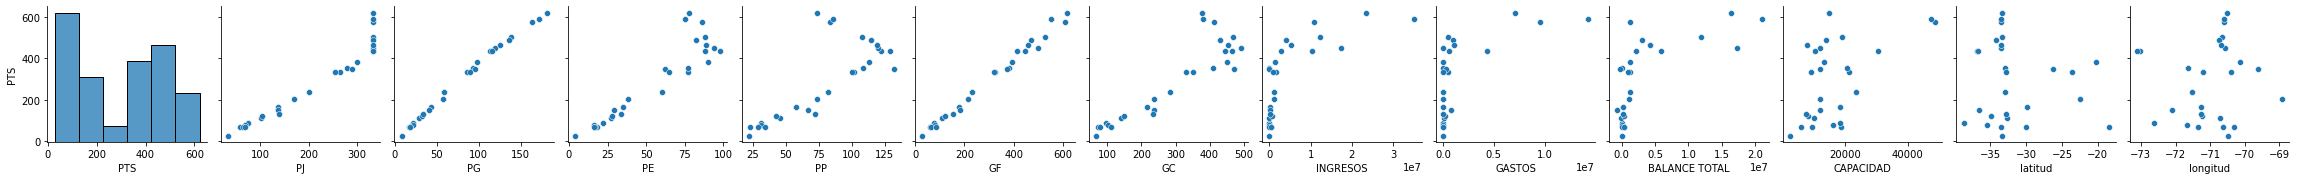

In [52]:
# Se realiza un pairplot para obtener una visualización primaria de los datos versus la variable PTS.
sns.pairplot(gpd_equipos,y_vars='PTS');

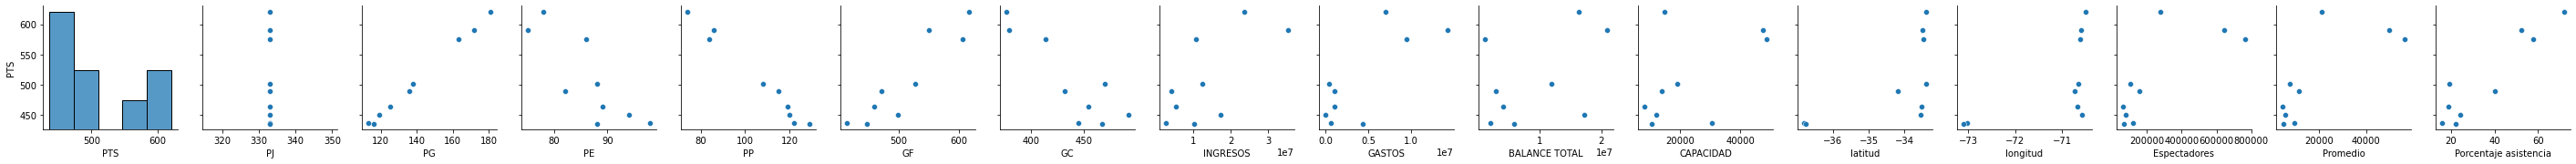

In [53]:
# Se realiza un pairplot para obtener una visualización primaria de los datos versus la variable PTS.
sns.pairplot(gpd_equipos_asistencia,y_vars='PTS');

Observemos gráficos individuales y sus regresiones lineales para cada variable.

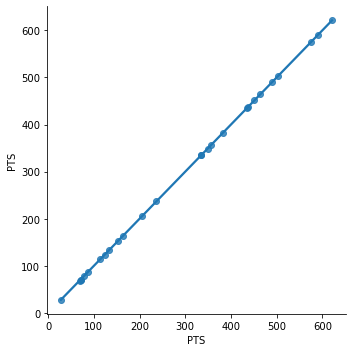

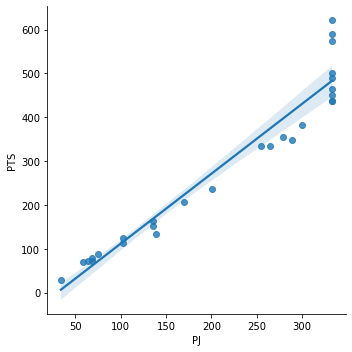

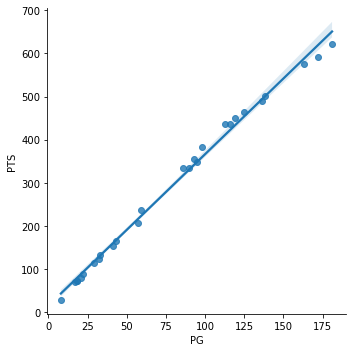

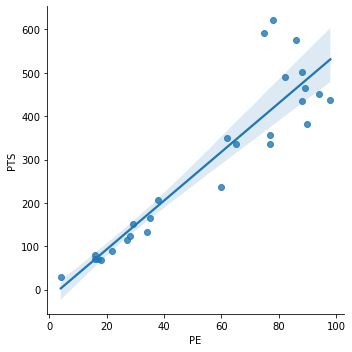

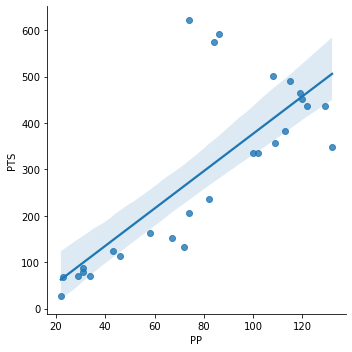

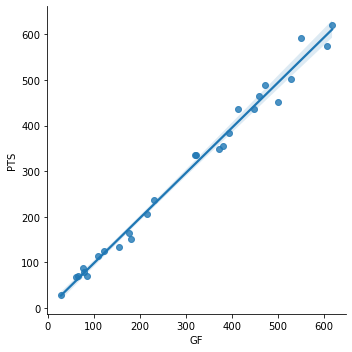

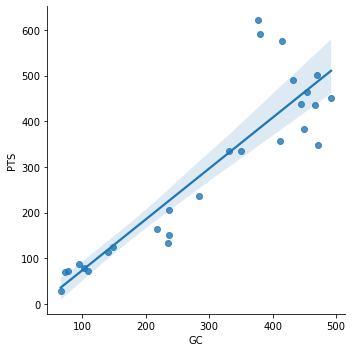

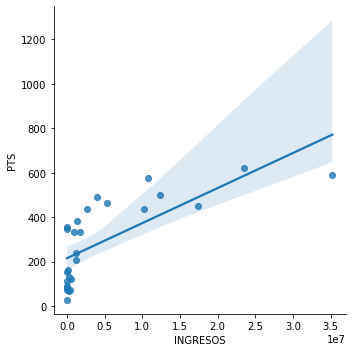

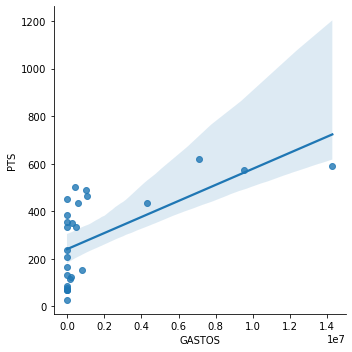

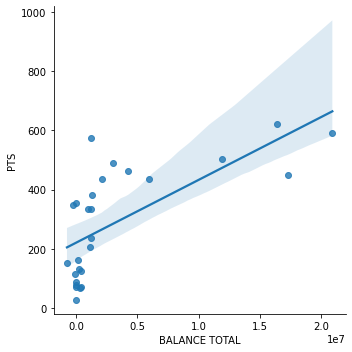

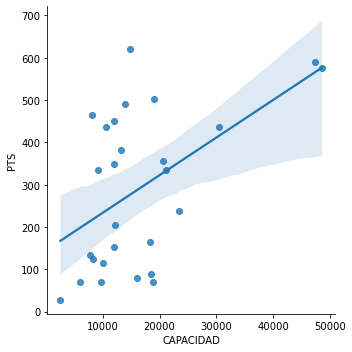

In [54]:
# Observemos gráficos de regresiones lineales de cada variable para el dataframe con todos los equipos.
df_modificado_equipos = gpd_equipos.drop(['REGION', 'CIUDAD', 'EQUIPO', 'ESTADIO', 'geometry', 'latitud', 'longitud'],axis = 1)
for columna in df_modificado_equipos.columns:
    sns.lmplot(data=gpd_equipos,x=columna,y='PTS');

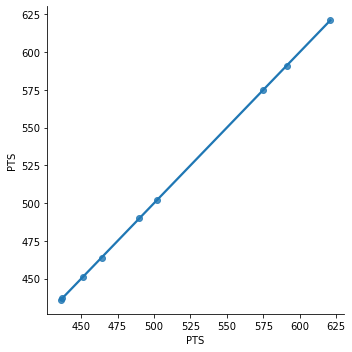

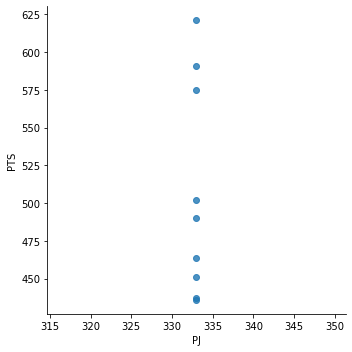

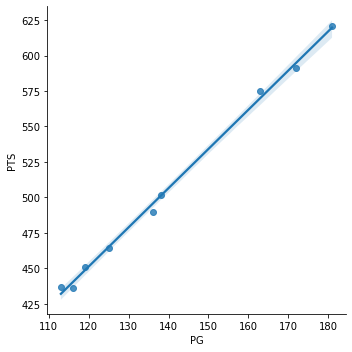

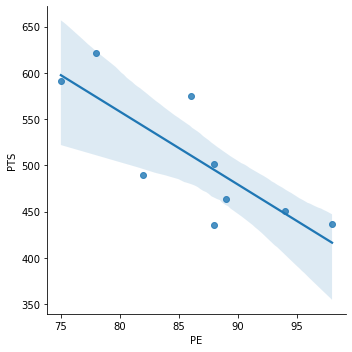

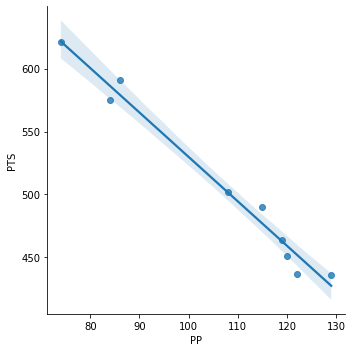

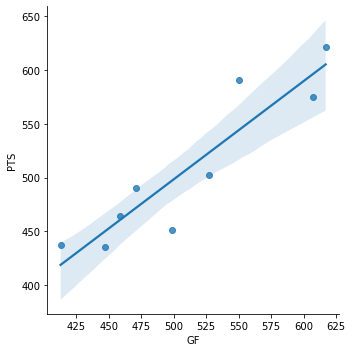

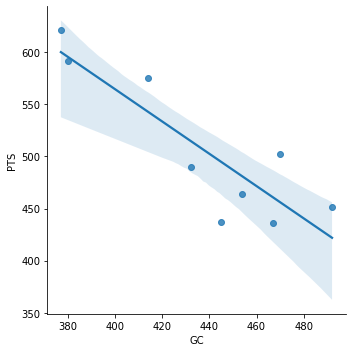

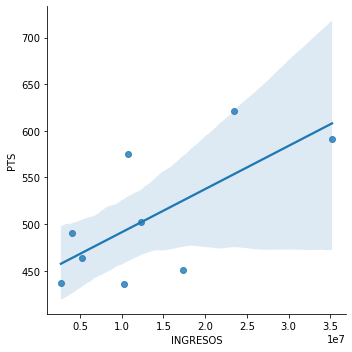

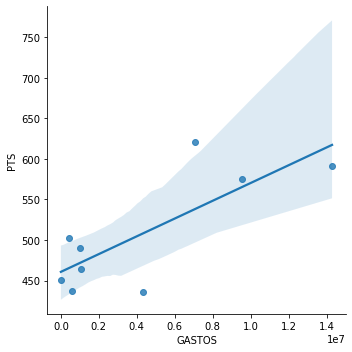

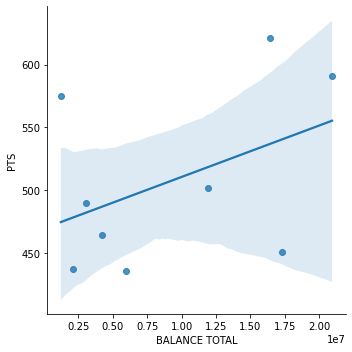

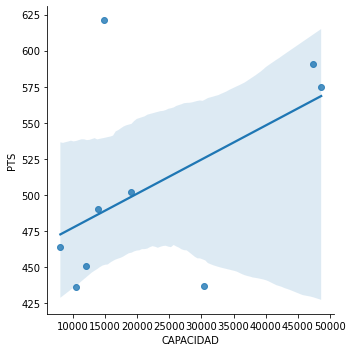

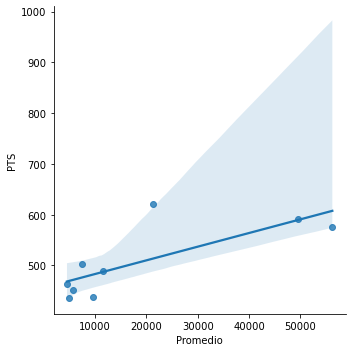

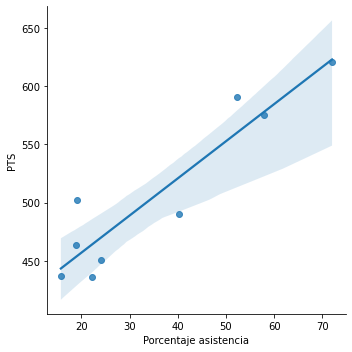

In [55]:
# Observemos gráficos de regresiones lineales de cada variable para el dataframe con los equipos con permanencia completa en el intervalo de tiempo medido.
df_modificado_asistencia = gpd_equipos_asistencia.drop(['REGION', 'CIUDAD', 'EQUIPO', 'ESTADIO', 'geometry', 'latitud', 'longitud', 'Espectadores'],axis = 1)
for columna in df_modificado_asistencia.columns:
    sns.lmplot(data=gpd_equipos_asistencia,x=columna,y='PTS');

Utilizamos un heatmap para observar la correlación entre las variables.

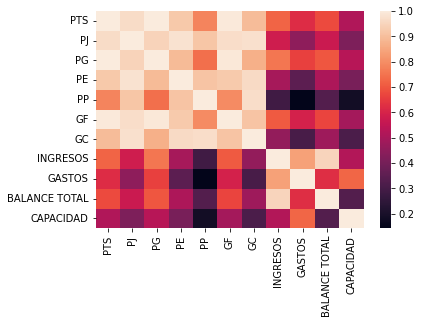

In [56]:
sns.heatmap(df_modificado_equipos.corr(),annot=False);

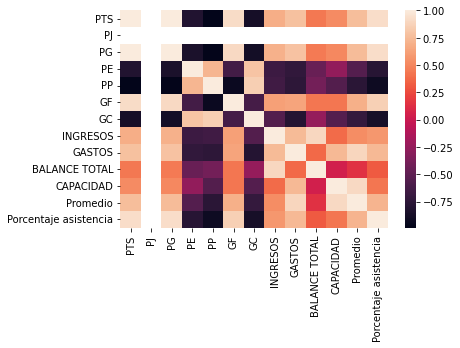

In [57]:
sns.heatmap(df_modificado_asistencia.corr(),annot=False);

#### Mapa interactivo con la localización de los equipos de primera división de la tabla de rendimiento acumulado.

In [ ]:
import plotly.express as px
fig = px.scatter_mapbox(gpd_equipos, lat="latitud", lon="longitud", color="EQUIPO", size="CAPACIDAD",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=4,
                  mapbox_style="carto-positron",height=1000,width=900,
                  center={"lat":-37,"lon":-72})
fig=fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### Análisis de datos

Para el análisis de datos nosotros realizamos un modelo de regresión multilineal el cual es parte de los modelos de aprendizaje supervisado. Esto ya que analizamos el rendimiento de cada equipo en base a los puntos obtenidos siendo esta la variable a predecir, mientras que los partidos jugados, partidos ganados, partidos perdidos, partidos empatados, goles a favor, goles en contra, ingresos, costos, y porcentaje de asistencia al estadio fueron consideradas como variables predictoras. En base a estos resultados fue que respondimos nuestras preguntas de investigación. A continuación se detalla el proceso de análisis de datos.
  


In [58]:
# Se genera el df
df_reg= df_rendimiento_ingresos.drop(columns='EQUIPO')
df_reg = df_reg.astype(int)
df_reg.head()

,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL
0,621,333,181,78,74,617,377,23505000,7085000,16420000
1,591,333,172,75,86,550,380,35208000,14275000,20933000
2,575,333,163,86,84,607,414,10750000,9520000,1230000
3,502,333,138,88,108,527,470,12360000,450000,11910000
4,490,333,136,82,115,471,432,4044000,1022000,3022000


In [59]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#### Estandarizaremos los datos, esto puesto que hay equipos en la tabla de la decada que no pertenecieron estos 10 años vistos a la primera division del torneo nacional, por lo tanto sus estadisticas se ven perjudicadas en terminos cuantitavos y para evitar esta brecha de error a nuestro analisis utilizaremos esta estrategia.

Coeficientes de regresión: [-1.48744835e+02  2.24394913e+02  7.18168092e+01  4.91464170e+01
  3.23727602e+00 -4.23154757e+00  2.15305727e-01  8.23433125e-02]


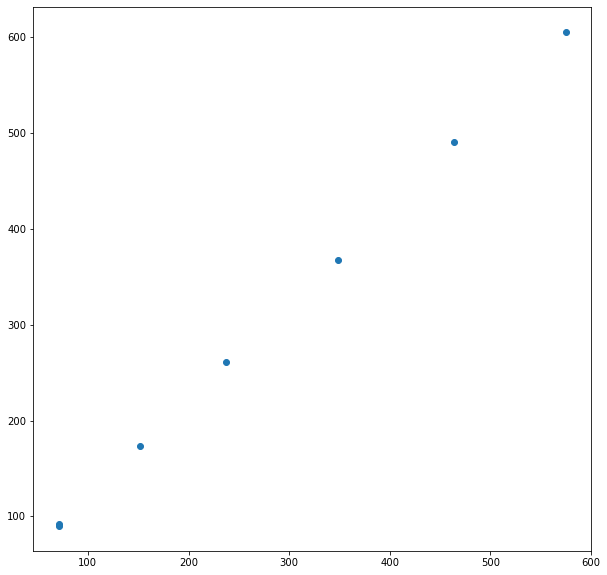

In [60]:
x= df_reg.drop(columns=['PTS','BALANCE TOTAL']).values

y = df_reg['PTS'].values

""" Entrenamiento """
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.259,random_state=0)

s_scaler= StandardScaler()
"""Creemos variables con los datos normalizados"""
xs_train = s_scaler.fit_transform(x_train)
xs_test = s_scaler.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg=LinearRegression()
lin_reg.fit(xs_train, y_train)

y_predict_train=lin_reg.predict(xs_train)
y_predict_test=lin_reg.predict(xs_test)

coef_reg=lin_reg.coef_

print('Coeficientes de regresión:',coef_reg)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict_test) 
plt.show()

In [61]:
rl_mse_test= mean_squared_error(y_test, y_predict_test)
rl_mse_train=mean_squared_error(y_train, y_predict_train)
rl_r2_score_test=r2_score(y_test, y_predict_test)
rl_r2_score_train=r2_score(y_train, y_predict_train)

print(f'MSE test: {rl_mse_test}')
print(f'MSE entrenamiento: {rl_mse_train}')
print(f'r2 score test: {rl_r2_score_test}')
print(f'r2 entrenamiento: {rl_r2_score_train}')

MSE test: 543.653263497176
MSE entrenamiento: 0.3115662360644408
r2 score test: 0.983525434538156
r2 entrenamiento: 0.9999908217342244


In [62]:
# Se utiliza un metodo de cross validation para obtener los MSE y luego se promedian
mse = cross_val_score(lin_reg,xs_test,y_test,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(f'Cross Validation Scores: {mse}')
print(f'Media MSE validación cruzada: {mean_mse}')

Cross Validation Scores: [-2408.72741482  -393.88940558   -28.62761722   -19.07764305
    -3.35953853]
Media MSE validación cruzada: -570.7363238384853


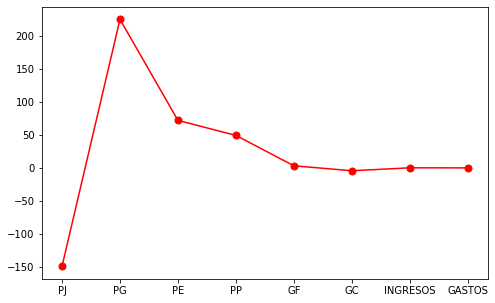

In [65]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,alpha=1,linestyle='-',marker='o',markersize=7,color='red',label='Linear Regression')
df_colums= df_reg.drop(columns=['PTS','BALANCE TOTAL'],axis=1)
ax.set_xticks(np.arange(len(df_colums.columns)))
ax.set_xticklabels(df_colums.columns)
plt.show()

In [66]:
print(coef_reg)

[-1.48744835e+02  2.24394913e+02  7.18168092e+01  4.91464170e+01
  3.23727602e+00 -4.23154757e+00  2.15305727e-01  8.23433125e-02]


Alpha: 0.01
MSE entrenamiento: 1.1838106675294362
MSE test: 557.6007351612542
r2 score entrenamiento: 0.9999651074856873
r2 score test: 0.9839949312391233

Alpha: 0.1
MSE entrenamiento: 8.16035562104862
MSE test: 582.6491298082165
r2 score entrenamiento: 0.9997585642963175
r2 score test: 0.9832896582490641

Alpha: 1
MSE entrenamiento: 118.31520991528353
MSE test: 572.4200997963146
r2 score entrenamiento: 0.9964099595770098
r2 score test: 0.9833439616196189

Alpha: 10
MSE entrenamiento: 741.0386833333725
MSE test: 694.5114643712059
r2 score entrenamiento: 0.9739176914376021
r2 score test: 0.9766155867676023

Alpha: 100
MSE entrenamiento: 7368.94699869256
MSE test: 6863.352676368668
r2 score entrenamiento: 0.2769963430144198
r2 score test: 0.35128474297669454



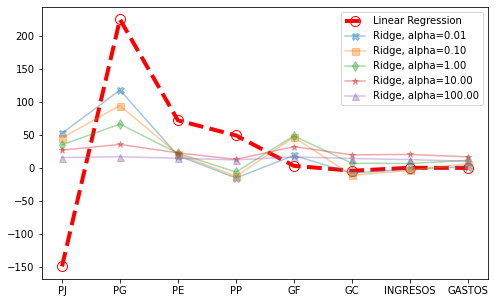

In [67]:
from sklearn.linear_model import Ridge
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='--',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

markers=['X','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    rr = Ridge(alpha=al) 
    rr.fit(xs_train, y_train)
    rr_predict_train=rr.predict(xs_train)
    rr_predict_test=rr.predict(xs_test)

    Ridge_train_score = r2_score(rr_predict_train,y_train)
    Ridge_test_score = r2_score(rr_predict_test, y_test)
    print(f'MSE entrenamiento: {mean_squared_error(y_train, rr_predict_train)}')
    print(f'MSE test: {mean_squared_error(y_test, rr_predict_test)}')

    print(f'r2 score entrenamiento: {Ridge_train_score}')
    print(f'r2 score test: {Ridge_test_score}\n')
    ax.plot(rr.coef_,alpha=0.4,linestyle='-',marker=markers[na],markersize=7,label='Ridge, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(df_colums.columns)));
ax.set_xticklabels(df_colums.columns);
ax.legend();
plt.show()

In [68]:
# Se utiliza un metodo de cross validation para obtener los MSE y luego se promedian
mse = cross_val_score(rr,xs_test,y_test,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(f'Cross Validation Scores: {mse}')
print(f'Media MSE validación cruzada: {mean_mse}')

Cross Validation Scores: [-50727.72210903  -7967.87167403 -27356.06422795  -3316.85941689
 -30411.79221238]
Media MSE validación cruzada: -23956.061928055045


Alpha: 0.01
MSE entrenamiento: 1.0726388106395062
MSE test: 566.8839481257711
r2 score entrenamiento: 0.9999683931357972
r2 score test: 0.9839505297378126

Alpha: 0.1
MSE entrenamiento: 1.0330849635875061
MSE test: 552.4553806297724
r2 score entrenamiento: 0.999969546061398
r2 score test: 0.9841300906456264

Alpha: 1
MSE entrenamiento: 1.6324387631065669
MSE test: 538.2787618439555
r2 score entrenamiento: 0.9999513802941761
r2 score test: 0.9842652624919028

Alpha: 10
MSE entrenamiento: 118.45869956340464
MSE test: 614.3643425432068
r2 score entrenamiento: 0.9960919141343915
r2 score test: 0.9798424429557416

Alpha: 100
MSE entrenamiento: 10150.162046688694
MSE test: 10131.06420320584
r2 score entrenamiento: -0.4478937854164158
r2 score test: -0.4390395315044615



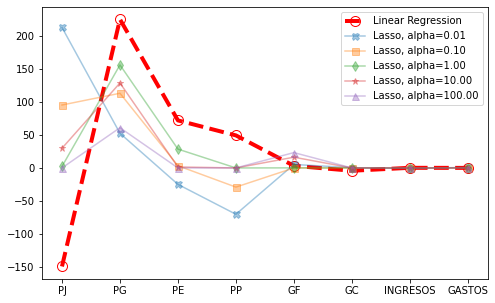

In [70]:
from sklearn.linear_model import Lasso
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='--',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

markers=['X','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    ll = Lasso(alpha=al) 
    ll.fit(xs_train, y_train)
    ll_predict_train=ll.predict(xs_train)
    ll_predict_test=ll.predict(xs_test)

    Lasso_train_score = r2_score(ll_predict_train,y_train)
    Lasso_test_score = r2_score(ll_predict_test, y_test)

    print(f'MSE entrenamiento: {mean_squared_error(y_train, ll_predict_train)}')
    print(f'MSE test: {mean_squared_error(y_test, ll_predict_test)}')

    print(f'r2 score entrenamiento: {Lasso_train_score}')
    print(f'r2 score test: {Lasso_test_score}\n')
    
    ax.plot(ll.coef_,alpha=0.4,linestyle='-',marker=markers[na],markersize=7,label='Lasso, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(df_colums.columns)));
ax.set_xticklabels(df_colums.columns);
ax.legend();
plt.show()

In [71]:
# Se utiliza un metodo de cross validation para obtener los MSE y luego se promedian
mse = cross_val_score(ll,xs_test,y_test,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(f'Cross Validation Scores: {mse}')
print(f'Media MSE validación cruzada: {mean_mse}')

Cross Validation Scores: [-59223.16518018  -3374.86476063 -19029.55563633  -1873.02217964
 -20656.79586391]
Media MSE validación cruzada: -20831.480724137764


MSE entrenamiento: 1.6324387631066444
MSE test: 538.2787618439567
R2 entrenamiento (Lasso):1.0000
R2 test (Lasso):0.9843
Alpha: 1
[2.23558768e+00 1.55573183e+02 2.84426431e+01 0.00000000e+00
 1.27451354e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]


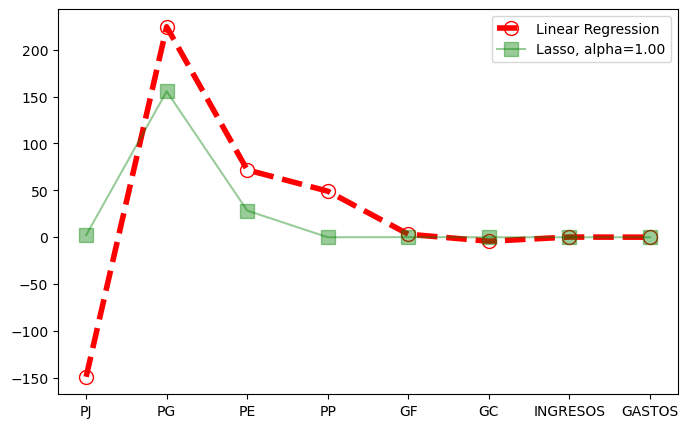

In [ ]:
alpha = 1
from sklearn.linear_model import Lasso

ll = Lasso(alpha=alpha) 
ll.fit(xs_train, y_train)

ll_predict_train=ll.predict(xs_train)
ll_predict_test = ll.predict(xs_test)

Lasso_train_score = r2_score(ll_predict_train,y_train)
Lasso_test_score = r2_score(ll_predict_test, y_test)
Lasso_mse_train_score= mean_squared_error(y_train,ll_predict_train)
Lasso_mse_test_score = mean_squared_error(y_test, ll_predict_test)
print(f'MSE entrenamiento: {Lasso_mse_train_score}')
print(f'MSE test: {Lasso_mse_test_score}')
print('R2 entrenamiento (Lasso):%.4f'%Lasso_train_score)
print('R2 test (Lasso):%.4f'%Lasso_test_score)
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='--',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

print('Alpha:',alpha)

print(ll.coef_)
ax.plot(ll.coef_,alpha=0.4,linestyle='-',marker='s',markersize=10,color='g',label='Lasso, alpha=%.2f'%alpha)
    

ax.set_xticks(np.arange(len(df_colums.columns)));
ax.set_xticklabels(df_colums.columns);
ax.legend();
plt.show()

In [72]:
# Se genera el df
df_reg_asistencia = gpd_equipos_asistencia.drop(columns=['REGION', 'CIUDAD', 'EQUIPO', 'ESTADIO', 'geometry', 'latitud', 'longitud', 'Espectadores', 'Promedio', 'BALANCE TOTAL'])
df_reg_asistencia = df_reg_asistencia.astype(int)
df_reg_asistencia.head()

,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,CAPACIDAD,Porcentaje asistencia
0,575,333,163,86,84,607,414,10750000,9520000,48665,57
1,591,333,172,75,86,550,380,35208000,14275000,47347,52
2,437,333,113,98,122,413,445,2700000,596000,30448,15
3,502,333,138,88,108,527,470,12360000,450000,19000,19
4,621,333,181,78,74,617,377,23505000,7085000,14780,72


Coeficientes de regresión: [ 2.48689958e-14  1.71228410e+01 -1.12153692e+01 -1.65430027e+01
  1.39183392e+01 -8.20523988e+00  3.48525395e+00  4.21543486e+00
  1.19559077e+00 -8.38699579e+00]


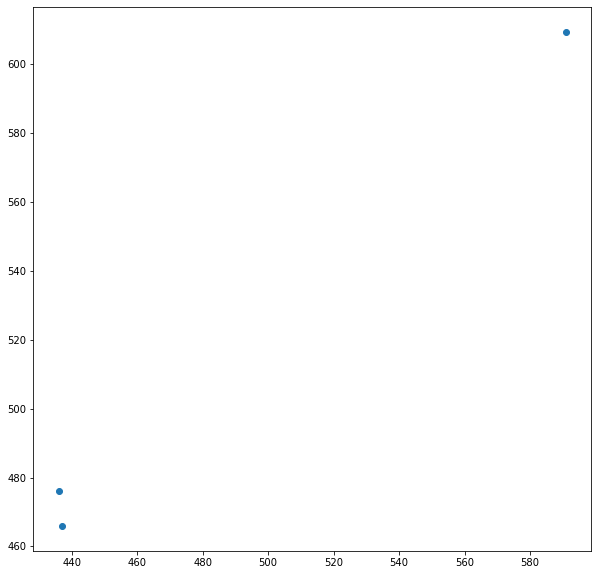

In [73]:
x= df_reg_asistencia.drop(columns=['PTS']).values

y = df_reg_asistencia['PTS'].values

""" Entrenamiento """
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

s_scaler= StandardScaler()
"""Creemos variables con los datos normalizados"""
xs_train = s_scaler.fit_transform(x_train)
xs_test = s_scaler.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg=LinearRegression()
lin_reg.fit(xs_train, y_train)

y_predict_train=lin_reg.predict(xs_train)
y_predict_test=lin_reg.predict(xs_test)

coef_reg=lin_reg.coef_

print('Coeficientes de regresión:',coef_reg)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict_test) 
plt.show()

In [74]:
rl_mse_test= mean_squared_error(y_test, y_predict_test)
rl_mse_train=mean_squared_error(y_train, y_predict_train)
rl_r2_score_test=r2_score(y_test, y_predict_test)
rl_r2_score_train=r2_score(y_train, y_predict_train)

print(f'MSE test: {rl_mse_test}')
print(f'MSE entrenamiento: {rl_mse_train}')
print(f'r2 score test: {rl_r2_score_test}')
print(f'r2 entrenamiento: {rl_r2_score_train}')

MSE test: 929.2732555368211
MSE entrenamiento: 5.385290446308774e-28
r2 score test: 0.8248196703147881
r2 entrenamiento: 1.0


In [82]:
# Se utiliza un metodo de cross validation para obtener los MSE y luego se promedian
mse = cross_val_score(lin_reg,xs_test,y_test,scoring='neg_mean_squared_error',cv=3)
mean_mse = np.mean(mse)
print(f'Cross Validation Scores: {mse}')
print(f'Media MSE validación cruzada: {mean_mse}')

Cross Validation Scores: [-3.64520238e+02 -2.60820417e+00 -2.40344855e+04]
Media MSE validación cruzada: -8133.871305255395


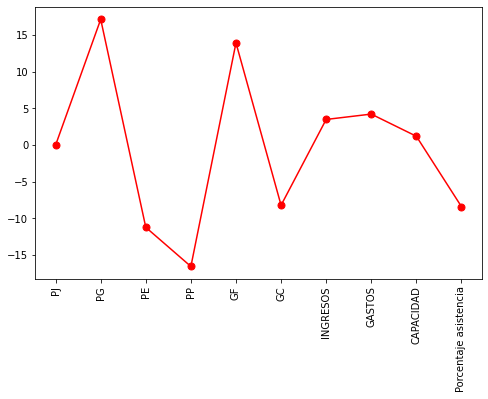

In [92]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,alpha=1,linestyle='-',marker='o',markersize=7,color='red',label='Linear Regression')
df_colums= df_reg_asistencia.drop(columns=['PTS'],axis=1)
ax.set_xticks(np.arange(len(df_colums.columns)))
ax.set_xticklabels(df_colums.columns)
plt.xticks(rotation=90)
plt.show()

In [77]:
print(coef_reg)

[ 2.48689958e-14  1.71228410e+01 -1.12153692e+01 -1.65430027e+01
  1.39183392e+01 -8.20523988e+00  3.48525395e+00  4.21543486e+00
  1.19559077e+00 -8.38699579e+00]


Alpha: 0.01
MSE entrenamiento: 0.01244028156221365
MSE test: 929.1652452006647
r2 score entrenamiento: 0.9999966495264337
r2 score test: 0.7828688383332574

Alpha: 0.1
MSE entrenamiento: 0.9577197454749218
MSE test: 928.9535070460776
r2 score entrenamiento: 0.9997400655849009
r2 score test: 0.7839334049378366

Alpha: 1
MSE entrenamiento: 21.658690833592335
MSE test: 944.9889712980913
r2 score entrenamiento: 0.9937918584445172
r2 score test: 0.7760806611680346

Alpha: 10
MSE entrenamiento: 203.13279297823735
MSE test: 1256.8472749887567
r2 score entrenamiento: 0.9124211867838761
r2 score test: 0.5577757620576501

Alpha: 100
MSE entrenamiento: 1947.1963175980216
MSE test: 3772.308102360332
r2 score entrenamiento: -5.713900165133775
r2 score test: -9.616623242703447



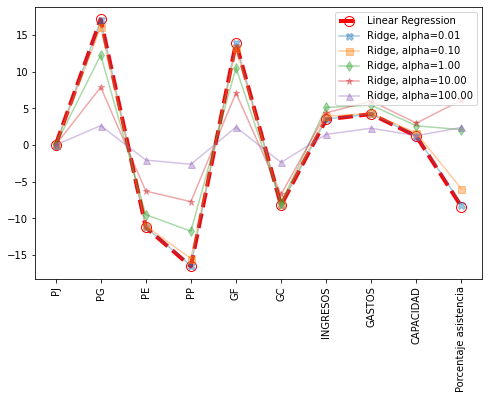

In [93]:
from sklearn.linear_model import Ridge
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='--',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

markers=['X','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    rr = Ridge(alpha=al) 
    rr.fit(xs_train, y_train)
    rr_predict_train=rr.predict(xs_train)
    rr_predict_test=rr.predict(xs_test)

    Ridge_train_score = r2_score(rr_predict_train,y_train)
    Ridge_test_score = r2_score(rr_predict_test, y_test)
    print(f'MSE entrenamiento: {mean_squared_error(y_train, rr_predict_train)}')
    print(f'MSE test: {mean_squared_error(y_test, rr_predict_test)}')

    print(f'r2 score entrenamiento: {Ridge_train_score}')
    print(f'r2 score test: {Ridge_test_score}\n')
    ax.plot(rr.coef_,alpha=0.4,linestyle='-',marker=markers[na],markersize=7,label='Ridge, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(df_colums.columns)));
ax.set_xticklabels(df_colums.columns);
plt.xticks(rotation=90)
ax.legend();
plt.show()

MSE entrenamiento: 0.9577197454749218
MSE test: 928.9535070460776
R2 entrenamiento (Ridge):0.9997
R2 test (Ridge):0.7163
Alpha: 0.1
[  0.          16.08504358 -11.02931861 -15.46133556  13.23945562
  -8.03650982   3.92172587   4.2986965    1.63802296  -5.96577928]


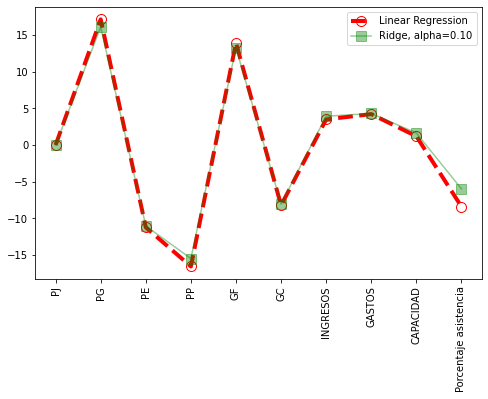

In [100]:
alpha = 0.1
from sklearn.linear_model import Ridge

rr = Ridge(alpha=alpha) 
rr.fit(xs_train, y_train)

rr_predict_train=rr.predict(xs_train)
rr_predict_test = rr.predict(xs_test)

Ridge_train_score = r2_score(rr_predict_train,y_train)
Ridge_test_score = r2_score(ll_predict_test, y_test)
Ridge_mse_train_score= mean_squared_error(y_train,rr_predict_train)
Ridge_mse_test_score = mean_squared_error(y_test, rr_predict_test)
print(f'MSE entrenamiento: {Ridge_mse_train_score}')
print(f'MSE test: {Ridge_mse_test_score}')
print('R2 entrenamiento (Ridge):%.4f'%Ridge_train_score)
print('R2 test (Ridge):%.4f'%Ridge_test_score)
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='--',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

print('Alpha:',alpha)

print(rr.coef_)
ax.plot(rr.coef_,alpha=0.4,linestyle='-',marker='s',markersize=10,color='g',label='Ridge, alpha=%.2f'%alpha)
    

ax.set_xticks(np.arange(len(df_colums.columns)));
ax.set_xticklabels(df_colums.columns);
plt.xticks(rotation=90)
ax.legend();
plt.show()

In [80]:
# Se utiliza un metodo de cross validation para obtener los MSE y luego se promedian
mse = cross_val_score(rr,xs_test,y_test,scoring='neg_mean_squared_error',cv=3)
mean_mse = np.mean(mse)
print(f'Cross Validation Scores: {mse}')
print(f'Media MSE validación cruzada: {mean_mse}')

Cross Validation Scores: [ -4630.95980338  -4181.08428125 -23873.96212954]
Media MSE validación cruzada: -10895.335404721392


Alpha: 0.01
MSE entrenamiento: 0.0031430055762726207
MSE test: 1000.7627430418025
r2 score entrenamiento: 0.9999991541200973
r2 score test: 0.7281527582406919

Alpha: 0.1
MSE entrenamiento: 0.10341644410993218
MSE test: 993.9872518977973
r2 score entrenamiento: 0.999972082577325
r2 score test: 0.7317962103155584

Alpha: 1
MSE entrenamiento: 1.1407247785449024
MSE test: 1018.0546442319334
r2 score entrenamiento: 0.9996827271523909
r2 score test: 0.7162777538792988

Alpha: 10
MSE entrenamiento: 100.83375344652067
MSE test: 1332.2554351554447
r2 score entrenamiento: 0.9611345057658791
r2 score test: 0.48555274374824076

Alpha: 100
MSE entrenamiento: 3716.4722222222226
MSE test: 6155.3611111111095
r2 score entrenamiento: 0.0
r2 score test: 0.0



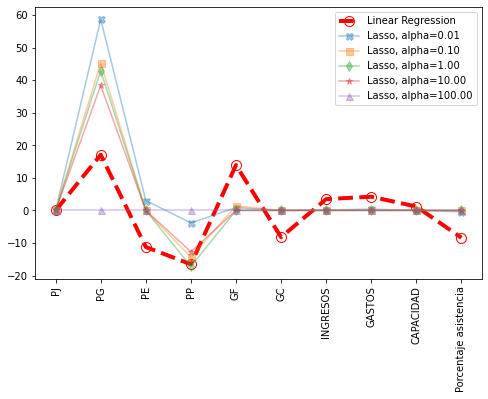

In [94]:
from sklearn.linear_model import Lasso
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='--',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

markers=['X','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    ll = Lasso(alpha=al) 
    ll.fit(xs_train, y_train)
    ll_predict_train=ll.predict(xs_train)
    ll_predict_test=ll.predict(xs_test)

    Lasso_train_score = r2_score(ll_predict_train,y_train)
    Lasso_test_score = r2_score(ll_predict_test, y_test)

    print(f'MSE entrenamiento: {mean_squared_error(y_train, ll_predict_train)}')
    print(f'MSE test: {mean_squared_error(y_test, ll_predict_test)}')

    print(f'r2 score entrenamiento: {Lasso_train_score}')
    print(f'r2 score test: {Lasso_test_score}\n')
    
    ax.plot(ll.coef_,alpha=0.4,linestyle='-',marker=markers[na],markersize=7,label='Lasso, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(df_colums.columns)));
ax.set_xticklabels(df_colums.columns);
plt.xticks(rotation=90)
ax.legend();
plt.show()

In [85]:
# Se utiliza un metodo de cross validation para obtener los MSE y luego se promedian
mse = cross_val_score(ll,xs_test,y_test,scoring='neg_mean_squared_error',cv=3)
mean_mse = np.mean(mse)
print(f'Cross Validation Scores: {mse}')
print(f'Media MSE validación cruzada: {mean_mse}')

Cross Validation Scores: [ -6084.    -5852.25 -23870.25]
Media MSE validación cruzada: -11935.5


MSE entrenamiento: 1.1407247785449024
MSE test: 1018.0546442319334
R2 entrenamiento (Lasso):0.9997
R2 test (Lasso):0.7163
Alpha: 1
[  0.          42.93866884  -0.         -17.20207067   0.
  -0.           0.           0.           0.           0.        ]


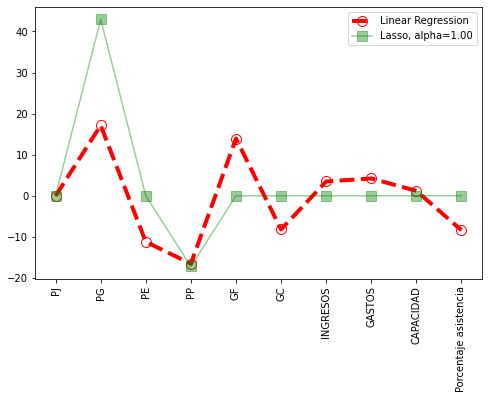

In [95]:
alpha = 1
from sklearn.linear_model import Lasso

ll = Lasso(alpha=alpha) 
ll.fit(xs_train, y_train)

ll_predict_train=ll.predict(xs_train)
ll_predict_test = ll.predict(xs_test)

Lasso_train_score = r2_score(ll_predict_train,y_train)
Lasso_test_score = r2_score(ll_predict_test, y_test)
Lasso_mse_train_score= mean_squared_error(y_train,ll_predict_train)
Lasso_mse_test_score = mean_squared_error(y_test, ll_predict_test)
print(f'MSE entrenamiento: {Lasso_mse_train_score}')
print(f'MSE test: {Lasso_mse_test_score}')
print('R2 entrenamiento (Lasso):%.4f'%Lasso_train_score)
print('R2 test (Lasso):%.4f'%Lasso_test_score)
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='--',marker='o',markersize=10,color='r',lw=4,mfc='None',label='Linear Regression')

print('Alpha:',alpha)

print(ll.coef_)
ax.plot(ll.coef_,alpha=0.4,linestyle='-',marker='s',markersize=10,color='g',label='Lasso, alpha=%.2f'%alpha)
    

ax.set_xticks(np.arange(len(df_colums.columns)));
ax.set_xticklabels(df_colums.columns);
plt.xticks(rotation=90)
ax.legend();
plt.show()

#### Referencias:
* ##### Tabla final de temporada:
  * ##### 2020 : https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2020 
  * ##### 2019 : https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2019 
* ##### Datos de Estadio y asistencia
    * ##### Asistencia de público: http://www.estadioseguro.gob.cl/2019/01/04/asistencia-de-publico-a-los-estadios-marca-cifra-record-en-2018/
    * #####